In [1]:
from finance_utils.electrical.china.spot.discrete.probabilistic_forecast import DiscreteSpot,ProbabilisticDiscreteCurve
from finance_utils.electrical.china.spot.discrete.testback import TestBack
import numpy

In [2]:
from data_utils.stochastic_utils.distributions.baseclass import ABCDistribution
from data_utils.stochastic_utils.distributions.basic_distributions import NormalDistribution

In [3]:
dayahead = ProbabilisticDiscreteCurve([
    NormalDistribution(200, 9),
    NormalDistribution(201, 8),
    NormalDistribution(203, 7),
    NormalDistribution(102, 6),
])

realtime = ProbabilisticDiscreteCurve([
    NormalDistribution(250, 20),
    NormalDistribution(200, 21),
    NormalDistribution(200, 22),
    NormalDistribution(150, 53),
])

quantity = ProbabilisticDiscreteCurve([
    NormalDistribution(10, 1),
    NormalDistribution(9, 3),
    NormalDistribution(15, 1),
    NormalDistribution(25, 2),
])

spot = DiscreteSpot(dayahead, realtime, quantity)

In [4]:
from matplotlib import pyplot

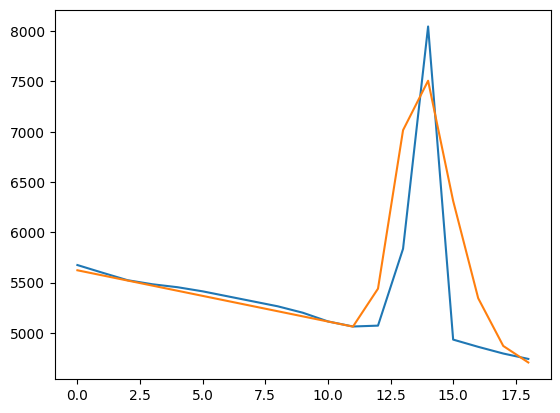

In [5]:
testback = TestBack(spot.random_sample(n=100, eps=50))
y = [
    numpy.median(
        testback.testback_yield([i] * 4).yield_curve
    ) for i in range(1,20)
]
y_hat = [
    numpy.mean(
        testback.testback_yield([i] * 4).yield_curve
    ) for i in range(1,20)
]
pyplot.plot(y)
pyplot.plot(y_hat)